## 07 - Comparación
Se compararán a continuación, los datos estimados en la inversión con los datos obtenido desde el archivo netCDF, además de calcular la media de estos cada 20 años.

In [3]:
# Librerías para el tratamiento de los datos
import numpy as np

# Visualización de los datos
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="whitegrid")

In [4]:
# Leo los datos que voy a querer comparar
sat = np.genfromtxt(f"../resultados/datos/anomalias_aire.csv",delimiter=",")
mest = np.genfromtxt(f"../resultados/datos/mest_media.csv",delimiter=",")
std_error = np.genfromtxt(f"../resultados/datos/error_std.csv",delimiter=",")

In [5]:
# Defino los intervalos de años con los que se está trabajando
urteak_anom_aire=np.arange(1880,2022)
urteak_mest=np.arange(1464,1984)

In [6]:
# Función para calcular la media cada 20 años
#===============================================================================
def media_20(mest:np.array)-> list:
    division = [mest[i:i+20] for i in range (0,len(mest),20)]
    bb_20 = []
    for i in division:
        em = sum(i)/len(i)
        suma = 0
        while(suma<20):
            bb_20.append(em)
            suma+=1
    return bb_20

In [7]:
# Hago media cada 20 años de las anomalías estimadas
mest_20 = []
mest_20 = media_20(mest)
# Hago media cada 20 años de el error estandar
std_20 = media_20(std_error)

# Hago media cada 20 años de los datos registrados SAT
sat_20 = media_20(sat)
sat_20=sat_20[:len(urteak_anom_aire)]

In [8]:
# Información de el último dato que no se tiene en cuenta -> la añadimos a mano
suma=0
while(suma<20):
    mest_20.append(0)
    std_20.append(0)
    suma +=1

In [9]:
# Suma y resta de el error estándar

# Sumar el error estandar a la media
sumar=[]

for i in range(len(mest_20)):
    sumar.append(mest_20[i]+std_20[i])


# Restar el error estandar a la media
resta=[]

for i in range(len(mest_20)):
    resta.append(mest_20[i]-std_20[i])

Text(0, 0.5, 'Anomalías de Temperatura')

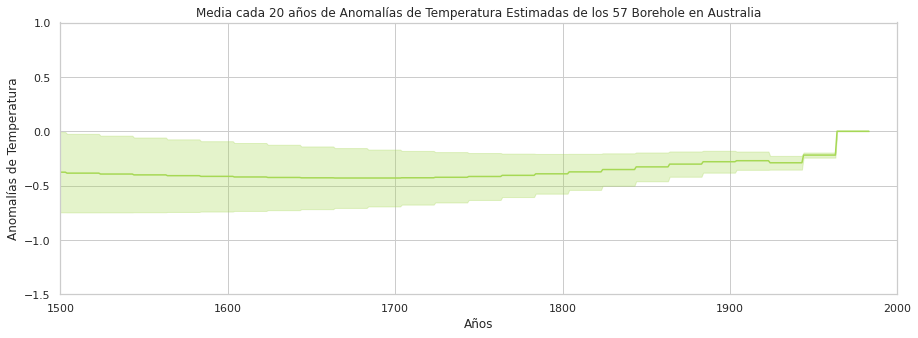

In [10]:
# Plot de las anomalías estimadas
plt.figure(figsize=(15,5))
plt.plot(urteak_mest,mest_20,color=sns.color_palette('Set2')[4])
plt.fill_between(urteak_mest, sumar, resta, alpha = 0.3,color=sns.color_palette('Set2')[4])

plt.ylim(-1.5,1.0)
plt.xlim(1500,2000)
plt.title("Media cada 20 años de Anomalías de Temperatura Estimadas de los 57 Borehole en Australia")
plt.xlabel("Años")
plt.ylabel("Anomalías de Temperatura")

Text(0.5, 1.0, 'Anomalías Estimadas vs. Reales')

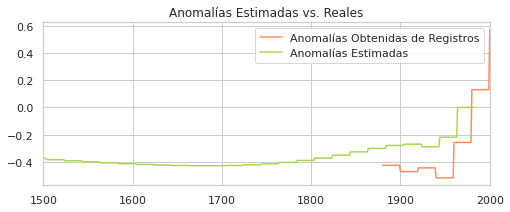

In [11]:
# Plot de las anomalías estimadas y de las obtenidas del archivo netCDF
plt.figure(figsize=(8,3))
plt.xlim(1500,2000)
plt.plot(urteak_anom_aire,sat_20,label="Anomalías Obtenidas de Registros", color=sns.color_palette('Set2')[1])
plt.plot(urteak_mest,mest_20,label="Anomalías Estimadas",color=sns.color_palette('Set2')[4])

plt.legend(loc="best")
plt.title(f"Anomalías Estimadas vs. Reales")

In [12]:
# Para obtener valores y poder compararlos debemos calibrar nuestros resultados
bb_20_norm=[]
for i in mest_20:
    bb_20_norm.append(i-0.25)

Text(0.5, 1.0, 'Anomalías Estimadas vs. Reales')

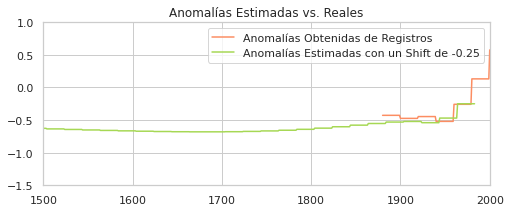

In [13]:
# Plot de las anomalías estimadas con un "shift" de "-0.25" y de las obtenidas del archivo netCDF
plt.figure(figsize=(8,3))
plt.xlim(1500,2000)
plt.ylim(-1.5,1.0)
plt.plot(urteak_anom_aire,sat_20,label="Anomalías Obtenidas de Registros", color=sns.color_palette('Set2')[1])
plt.plot(urteak_mest,bb_20_norm,label="Anomalías Estimadas con un Shift de -0.25",color=sns.color_palette('Set2')[4])
plt.plot()
plt.legend(loc="best")
plt.title(f"Anomalías Estimadas vs. Reales")

In [14]:
# Gráfico para compara con los del articulo
urteak_mest=np.arange(1464,1963)
# En este caso no nos hace falta añadir 20 datos

# Shift de 0.25 de las anomalías estimadas
norm_mest=[]
for i in range(len(mest)):
    norm_mest.append(mest[i]-0.25)

# Sumar el error estandar a la media
suma_total=[]
for i in range(len(mest)):
    suma_total.append(norm_mest[i]+std_error[i])

# Restar el error estandar a la media
resta_total=[]
for i in range(len(mest)):
    resta_total.append(norm_mest[i]-std_error[i])


Text(0, 0.5, 'Anomalías de Temperatura')

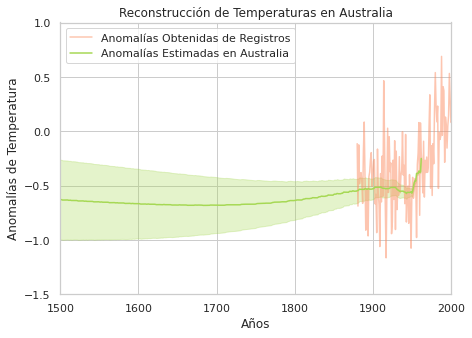

In [15]:
# Plot de las anomalías estimadas y archivadas sin calcular su media cada 20 años
plt.figure(figsize=(7,5))
plt.plot(urteak_anom_aire,sat,label="Anomalías Obtenidas de Registros", color=sns.color_palette('Set2')[1],alpha=0.5)
plt.plot(urteak_mest,norm_mest,label = "Anomalías Estimadas en Australia",color=sns.color_palette('Set2')[4])
plt.fill_between(urteak_mest, suma_total, resta_total,alpha = 0.3,color=sns.color_palette('Set2')[4])

plt.legend(loc="best")
plt.ylim(-1.5,1.0)
plt.xlim(1500,2000)
plt.title("Reconstrucción de Temperaturas en Australia")
plt.xlabel("Años")
plt.ylabel("Anomalías de Temperatura")

Text(0, 0.5, 'Anomalías de Temperatura')

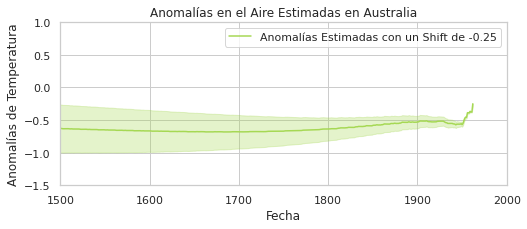

In [16]:
# Plot de las anomalías de temperatura estimadas

plt.figure(figsize=(8,3))
plt.xlim(1500,2000)
plt.ylim(-1.5,1.0)
plt.plot(urteak_mest,norm_mest,label="Anomalías Estimadas con un Shift de -0.25",color=sns.color_palette('Set2')[4])
plt.fill_between(urteak_mest, suma_total, resta_total,alpha = 0.3,color=sns.color_palette('Set2')[4])
plt.plot()
plt.legend(loc="best")
plt.title(f"Anomalías en el Aire Estimadas en Australia")
plt.xlabel("Fecha")
plt.ylabel("Anomalías de Temperatura")

In [17]:
# Guardo los datos de la media para calcular el Cross - Validation
np.savetxt("../resultados/datos/mest_media_shif.csv",norm_mest,delimiter=",")
np.savetxt("../resultados/datos/urteak_mest.csv",urteak_mest,delimiter=",")